In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sn

In [2]:
df=pd.read_csv(r"C:\Users\Yunis\Downloads\EPL_Soccer_MLR_LR.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [3]:
df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


In [4]:
numeric_df=df.select_dtypes(include=['number'])
numeric_df.corr()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


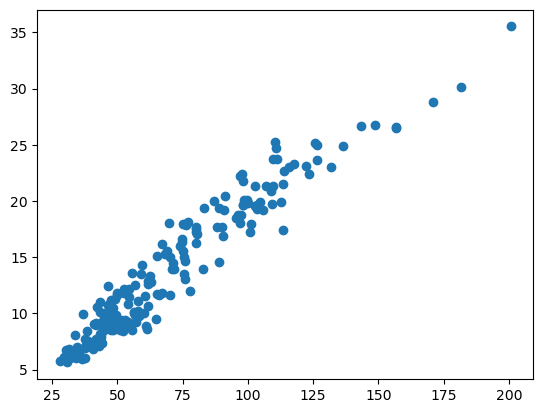

In [5]:
plt.scatter(df['Cost'],df['Score'])

In [6]:
x=df['Cost']
y=df['Score']

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,test_size=0.25,random_state=100)

In [8]:
lr=sn.OLS(y_train,x_train).fit()

In [9]:
lr.params

Cost    0.192891
dtype: float64

In [10]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.167e+04
Date:                Sun, 16 Jun 2024   Prob (F-statistic):                   3.84e-144
Time:                        14:23:17   Log-Likelihood:                         -297.42
No. Observations:                 151   AIC:                                      596.8
Df Residuals:                     150   BIC:                                      599.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cost           0.1929      0.002    108.014      0.000       0.189       0.196
==============================================================================
Omnibus:                        0.244   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.054
Skew:                           0.021   Prob(JB):                        0.974
Kurtosis:                       3.083   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
import pandas as pd
import numpy as np

In [12]:
df=pd.read_csv(r'C:\Users\Yunis\Downloads\NBA_Dataset_csv.csv')

In [13]:
df.head()

,Team,Points_Scored,Weightlifting_Sessions_Average,Yoga_Sessions_Average,Laps_Run_Per_Practice_Average,Water_Intake,Players_Absent_For_Sessions
0,Lakers,242,23.0,25.0,30.0,5.0,4.0
1,Lakers,144,24.0,26.0,31.0,5.0,8.0
2,Lakers,156,24.0,27.0,31.0,5.0,7.0
3,Lakers,159,26.0,29.0,34.0,5.0,1.0
4,Lakers,106,27.0,NaN,34.0,5.0,6.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Team                            159 non-null    object 
 1   Points_Scored                   159 non-null    int64  
 2   Weightlifting_Sessions_Average  150 non-null    float64
 3   Yoga_Sessions_Average           139 non-null    float64
 4   Laps_Run_Per_Practice_Average   145 non-null    float64
 5   Water_Intake                    145 non-null    float64
 6   Players_Absent_For_Sessions     130 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 8.8+ KB


In [15]:
df.rename(columns={'Weightlifting_Sessions_Average':'wsa'})

,Team,Points_Scored,wsa,Yoga_Sessions_Average,Laps_Run_Per_Practice_Average,Water_Intake,Players_Absent_For_Sessions
0,Lakers,242,23.0,25.0,30.0,5.0,4.0
1,Lakers,144,24.0,26.0,31.0,5.0,8.0
2,Lakers,156,24.0,27.0,31.0,5.0,7.0
3,Lakers,159,26.0,29.0,34.0,5.0,1.0
4,Lakers,106,27.0,NaN,34.0,5.0,6.0
...,...,...,...,...,...,...,...
154,Bulls,12,12.0,12.0,13.0,1.0,NaN
155,Bulls,13,12.0,12.0,14.0,1.0,NaN
156,Bulls,12,12.0,13.0,14.0,1.0,NaN
157,Bulls,20,13.0,14.0,15.0,1.0,6.0


In [16]:
df.shape

(159, 7)

In [17]:
df.Points_Scored

0      242
1      144
2      156
3      159
4      106
      ... 
154     12
155     13
156     12
157     20
158      0
Name: Points_Scored, Length: 159, dtype: int64

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\Yunis\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


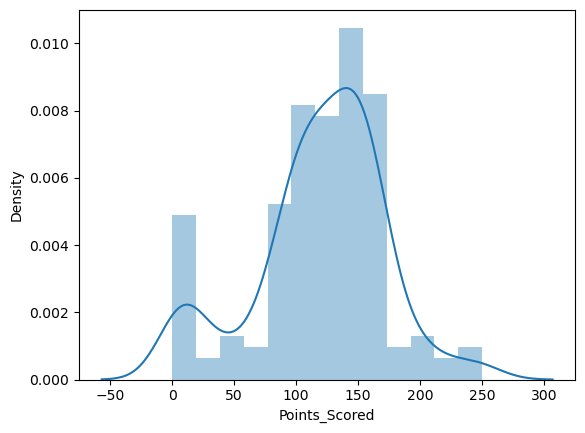

In [19]:
ax=sns.distplot(df.Points_Scored)

c:\Users\Yunis\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Points_Scored', ylabel='Density'>

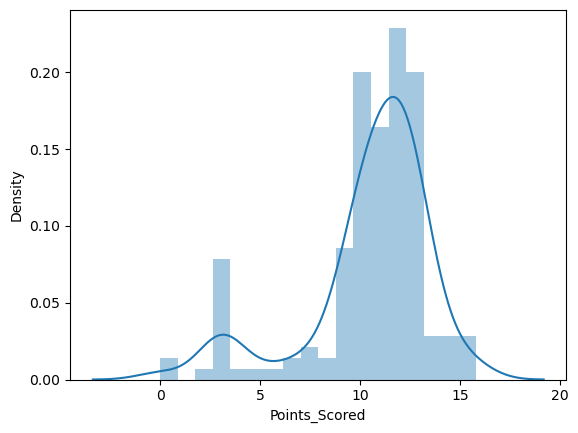

In [20]:
sns.distplot(np.sqrt(df.Points_Scored))

c:\Users\Yunis\anaconda3\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Points_Scored'>

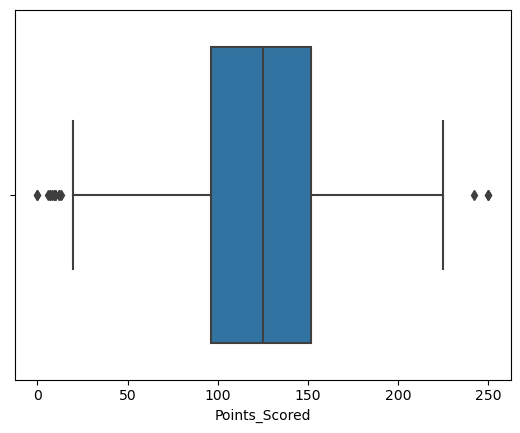

In [21]:
sns.boxplot(df.Points_Scored)

In [22]:
df.tail(100)

,Team,Points_Scored,Weightlifting_Sessions_Average,Yoga_Sessions_Average,Laps_Run_Per_Practice_Average,Water_Intake,Players_Absent_For_Sessions
59,Clippers,156,34.0,28.0,40.0,5.0,5.0
60,Clippers,122,37.0,29.0,44.0,5.0,2.0
61,Warriors,55,14.0,8.0,17.0,3.0,3.0
62,Warriors,60,14.0,8.0,17.0,3.0,4.0
63,Warriors,90,16.0,11.0,20.0,3.0,7.0
...,...,...,...,...,...,...,...
154,Bulls,12,12.0,12.0,13.0,1.0,NaN
155,Bulls,13,12.0,12.0,14.0,1.0,NaN
156,Bulls,12,12.0,13.0,14.0,1.0,NaN
157,Bulls,20,13.0,14.0,15.0,1.0,6.0


In [23]:
def plotting_box_violin_plots(df,x,y):
    fig,axes=plt.subplots(1,2,figsize=(18,10))
    fig.suptitle('Violin and box plots for variable: {}'.format(y))
    sns.violinplot(ax=axes[0],x=x,y=y,data=df)
    sns.boxplot(ax=axes[1],data=df[y])
    axes[0].set_title("Violin plot for variable : {}".format(y))
    axes[1].set_title("Box plot for variable : {}".format(y))

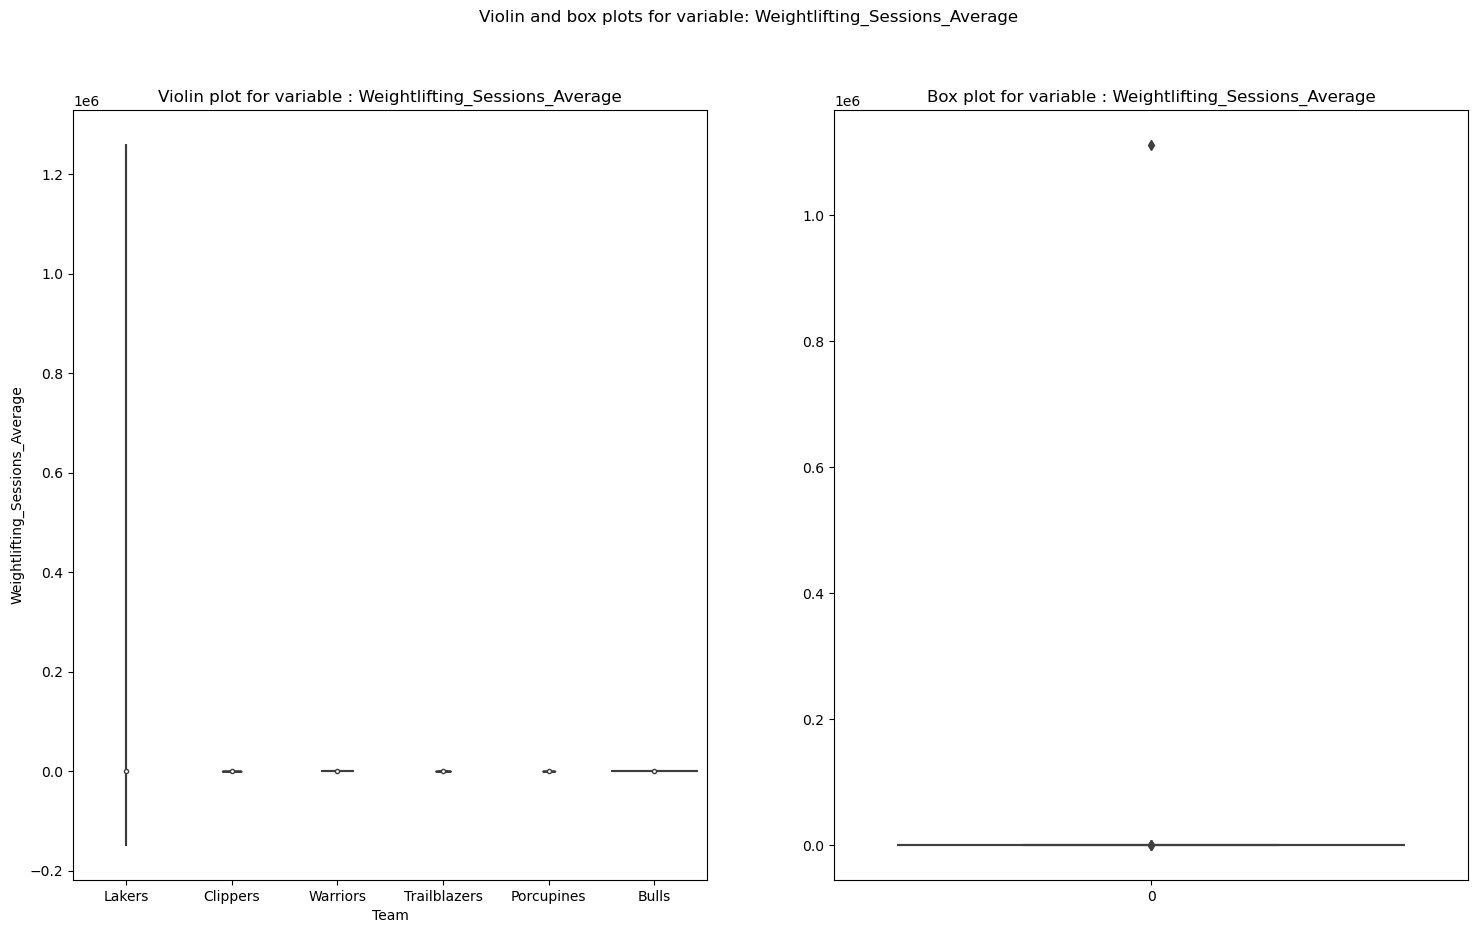

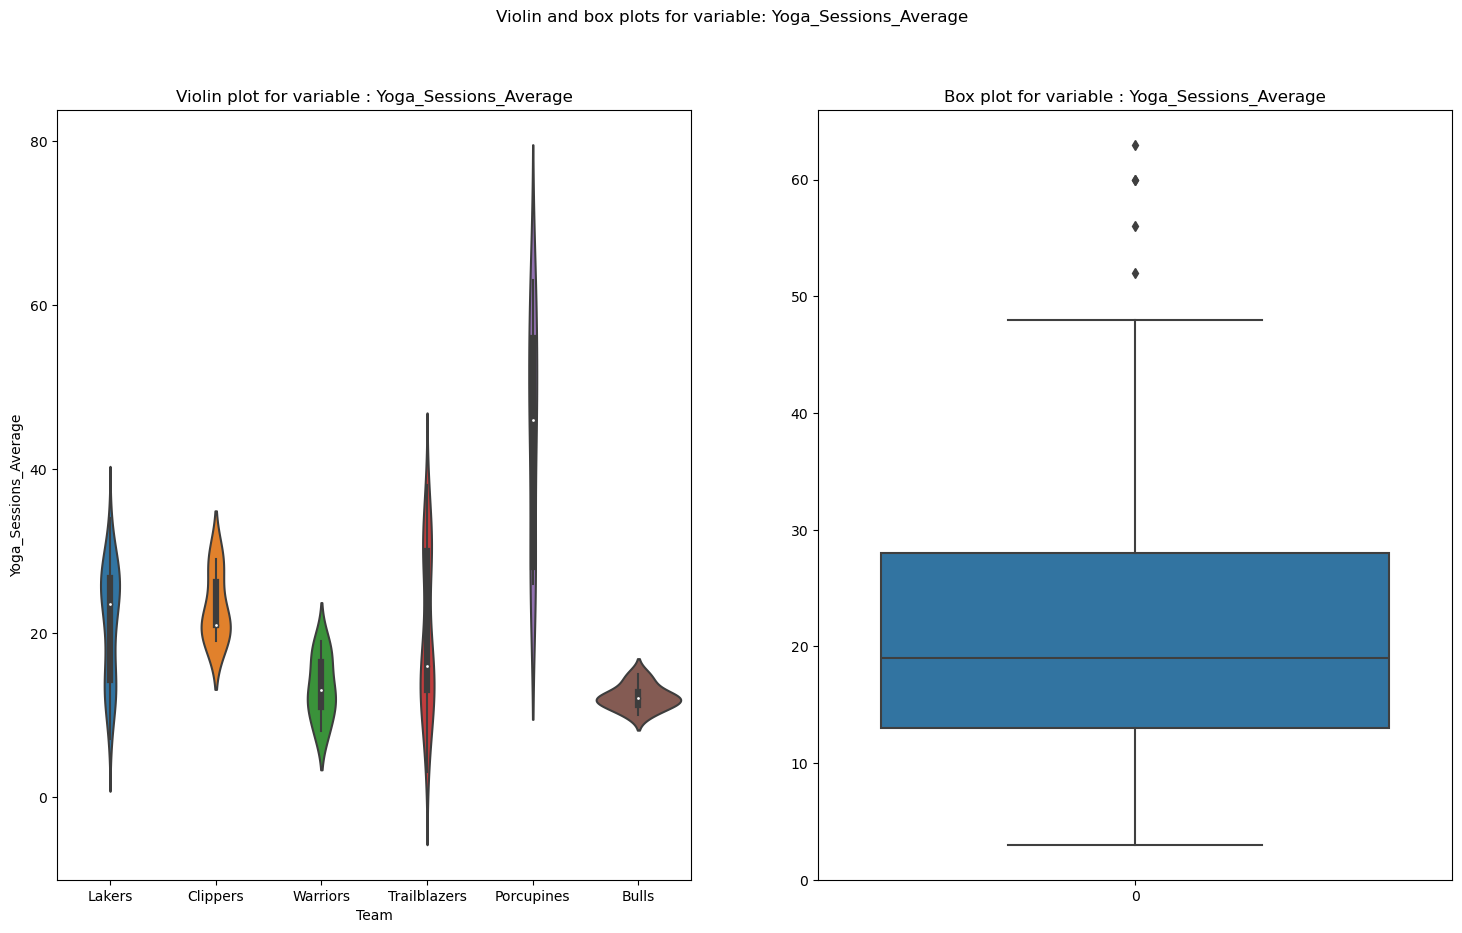

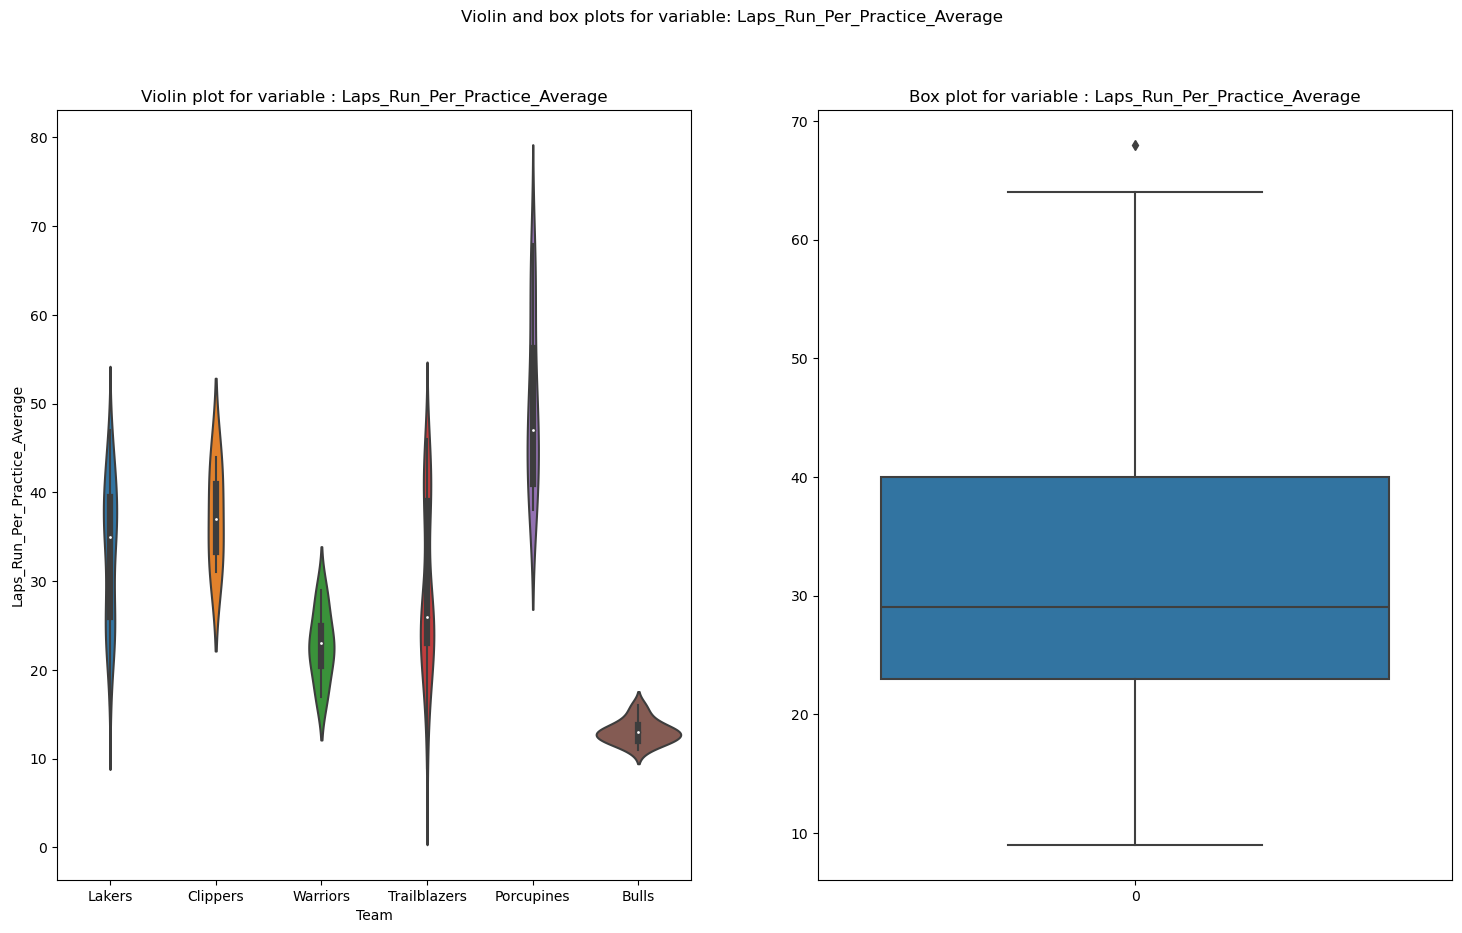

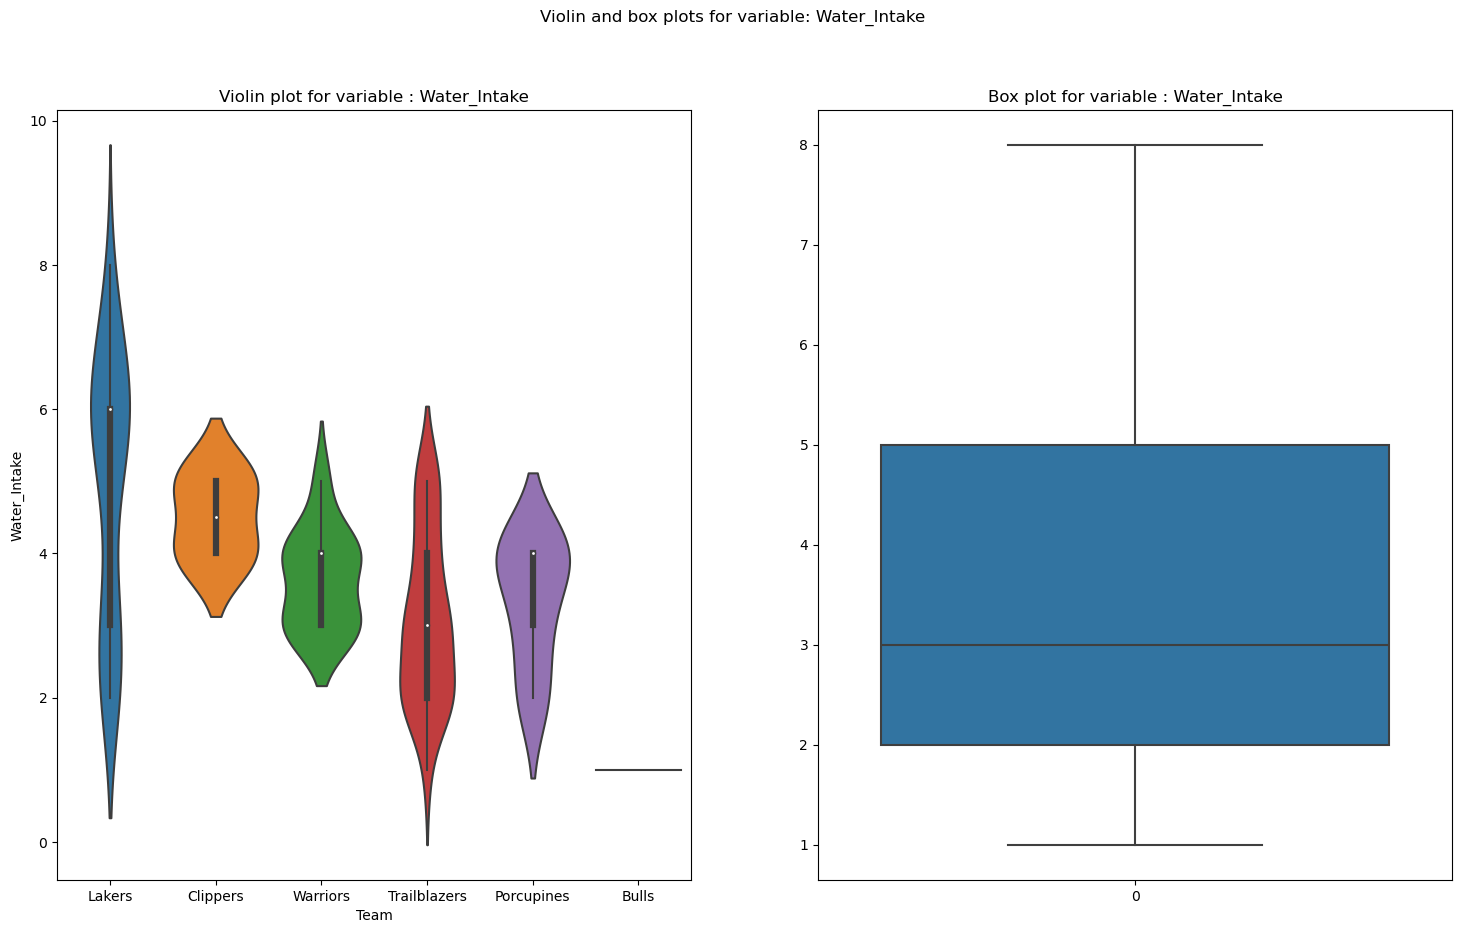

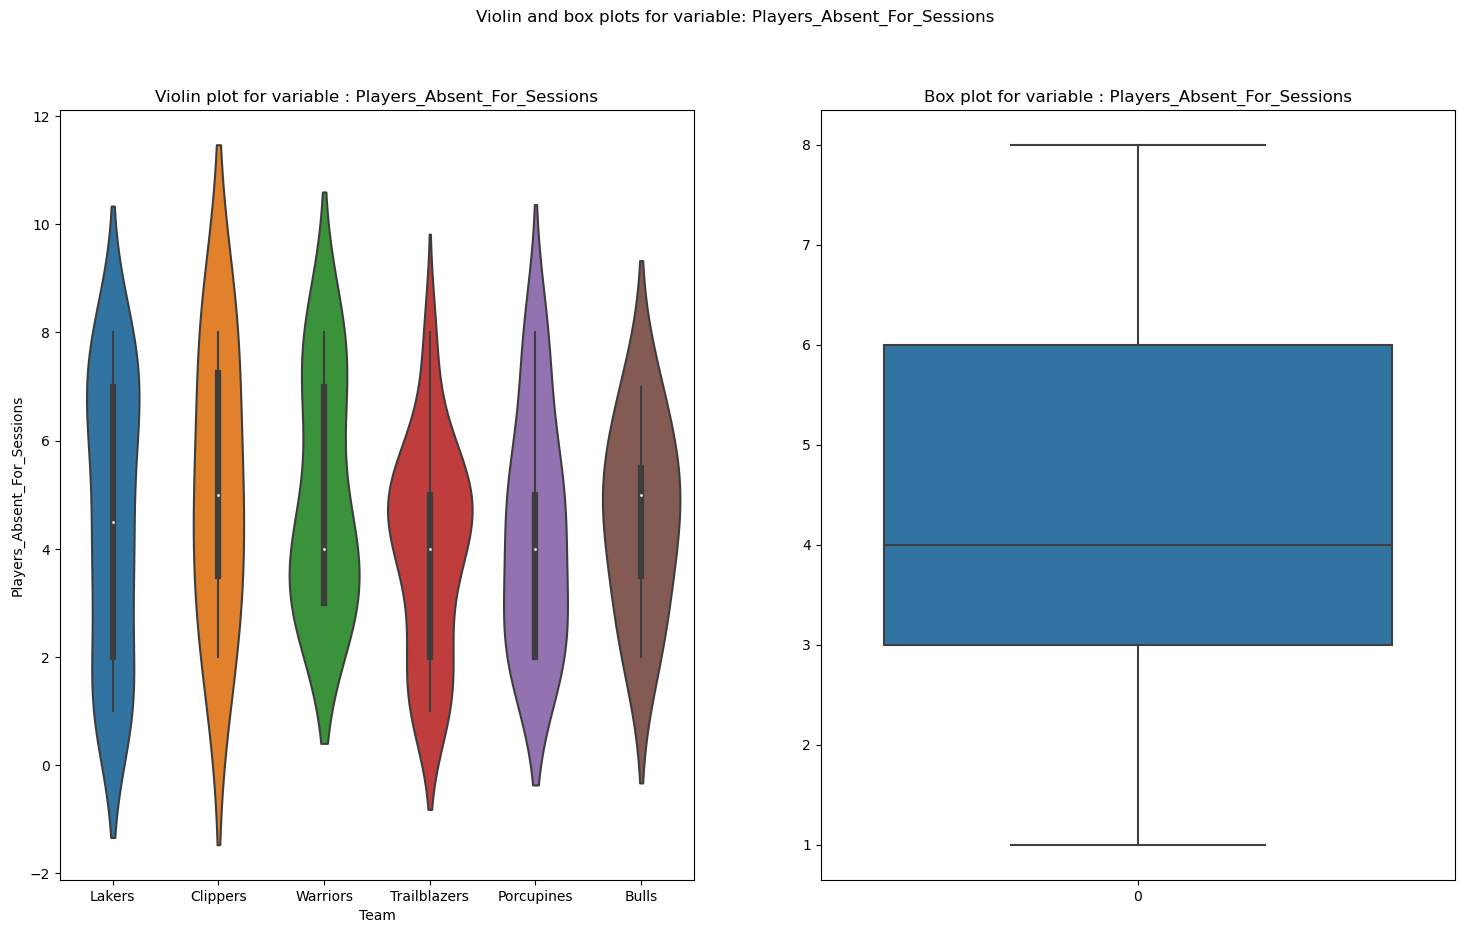

In [24]:
for x in ['Weightlifting_Sessions_Average','Yoga_Sessions_Average','Laps_Run_Per_Practice_Average','Water_Intake','Players_Absent_For_Sessions']:
    plotting_box_violin_plots(df,"Team",x)

In [25]:
def find_outliers(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    Upper_end=Q3+1.5*IQR
    Lower_end=Q1-1.5*IQR
    outlier=df[column][(df[column]>Upper_end)|(df[column]<Lower_end)]
    return outlier

In [26]:
for column in ['Weightlifting_Sessions_Average','Yoga_Sessions_Average','Laps_Run_Per_Practice_Average','Water_Intake','Players_Absent_For_Sessions']:
    print('outlier in column "%s"' %column)
    outlier=find_outliers(df,column)
    print(outlier)

outlier in column "Weightlifting_Sessions_Average"
8      1111111.0
142         56.0
143         56.0
144         59.0
Name: Weightlifting_Sessions_Average, dtype: float64
outlier in column "Yoga_Sessions_Average"
140    52.0
141    56.0
142    60.0
143    60.0
144    63.0
Name: Yoga_Sessions_Average, dtype: float64
outlier in column "Laps_Run_Per_Practice_Average"
144    68.0
Name: Laps_Run_Per_Practice_Average, dtype: float64
outlier in column "Water_Intake"
Series([], Name: Water_Intake, dtype: float64)
outlier in column "Players_Absent_For_Sessions"
Series([], Name: Players_Absent_For_Sessions, dtype: float64)


In [27]:
df_clean=df.drop([142,143,144])

In [28]:
df_clean.shape

(156, 7)

In [29]:
df_clean["Weightlifting_Sessions_Average"][df_clean["Weightlifting_Sessions_Average"]==1111111.0]=np.NaN

C:\Windows\Temp\ipykernel_5536\866213103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Weightlifting_Sessions_Average"][df_clean["Weightlifting_Sessions_Average"]==1111111.0]=np.NaN


In [30]:
df["Weightlifting_Sessions_Average"]

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: Weightlifting_Sessions_Average, Length: 159, dtype: float64

In [31]:
ncounts=pd.DataFrame(df_clean.isna().mean()).T

In [32]:
ncounts=ncounts.rename(columns={1:'data_missing'})
ncounts

,Team,Points_Scored,Weightlifting_Sessions_Average,Yoga_Sessions_Average,Laps_Run_Per_Practice_Average,Water_Intake,Players_Absent_For_Sessions
0,0.0,0.0,0.064103,0.128205,0.089744,0.089744,0.185897


<Axes: title={'center': '% of missing values across each column'}>

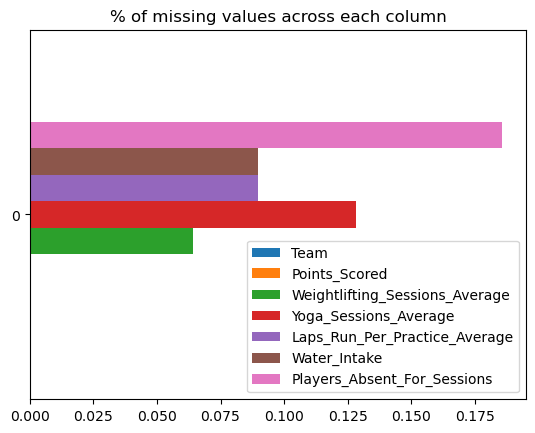

In [33]:
ncounts.plot(kind='barh', title='% of missing values across each column')

In [34]:
df_clean.shape,df_clean.dropna(axis=0).shape

((156, 7), (94, 7))

In [35]:
df_clean.shape, df_clean.dropna(axis=1).shape

((156, 7), (156, 2))

In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 0 to 158
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Team                            156 non-null    object 
 1   Points_Scored                   156 non-null    int64  
 2   Weightlifting_Sessions_Average  146 non-null    float64
 3   Yoga_Sessions_Average           136 non-null    float64
 4   Laps_Run_Per_Practice_Average   142 non-null    float64
 5   Water_Intake                    142 non-null    float64
 6   Players_Absent_For_Sessions     127 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 9.8+ KB


In [37]:
df_clean.columns
df_clean['Weightlifting_Sessions_Average'].fillna(-1)

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: Weightlifting_Sessions_Average, Length: 156, dtype: float64

In [38]:
df_clean['Weightlifting_Sessions_Average'].fillna(df_clean['Weightlifting_Sessions_Average'].mean())

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: Weightlifting_Sessions_Average, Length: 156, dtype: float64

c:\Users\Yunis\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Weightlifting_Sessions_Average', ylabel='Density'>

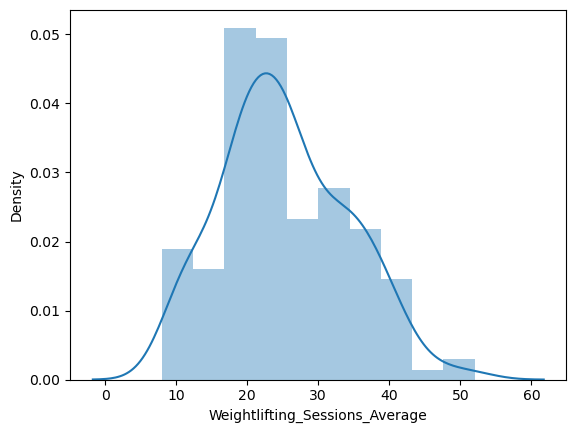

In [39]:
sns.distplot(df_clean['Weightlifting_Sessions_Average'].fillna(df_clean['Weightlifting_Sessions_Average'].mean()))

c:\Users\Yunis\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Weightlifting_Sessions_Average', ylabel='Density'>

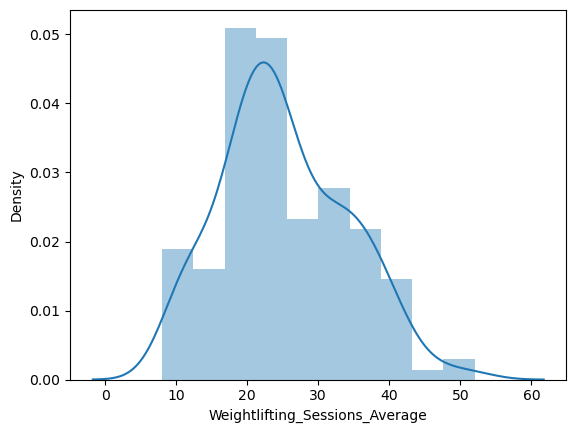

In [40]:
sns.distplot(df_clean['Weightlifting_Sessions_Average'].fillna(df_clean['Weightlifting_Sessions_Average'].median()))

In [41]:
mean_WL=df_clean.groupby("Team")["Weightlifting_Sessions_Average"].mean().to_dict()

In [42]:
mean_WL

{'Bulls': 11.214285714285714,
 'Clippers': 29.0,
 'Lakers': 26.04255319148936,
 'Porcupines': 39.42857142857143,
 'Trailblazers': 25.425925925925927,
 'Warriors': 18.727272727272727}

In [43]:
wL_series=df_clean['Weightlifting_Sessions_Average'].replace(mean_WL)

c:\Users\Yunis\anaconda3\Lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Weightlifting_Sessions_Average', ylabel='Density'>

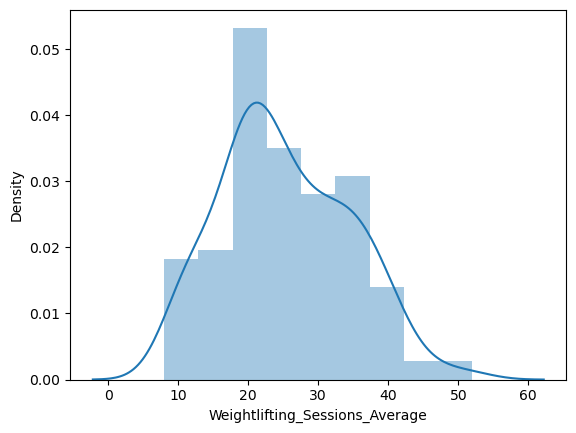

In [44]:
sns.distplot(df_clean['Weightlifting_Sessions_Average'].replace(mean_WL))

In [45]:
features=['Weightlifting_Sessions_Average','Yoga_Sessions_Average', 'Laps_Run_Per_Practice_Average','Water_Intake', 'Players_Absent_For_Sessions']
from sklearn.impute import SimpleImputer
impt=SimpleImputer(strategy='mean')
si_impt=impt.fit_transform(df_clean[features])
si_impt_df=pd.DataFrame(si_impt,columns=features)
si_impt_df


,Weightlifting_Sessions_Average,Yoga_Sessions_Average,Laps_Run_Per_Practice_Average,Water_Intake,Players_Absent_For_Sessions
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,20.823529,34.0,5.0,6.000000
...,...,...,...,...,...
151,12.0,12.000000,13.0,1.0,4.417323
152,12.0,12.000000,14.0,1.0,4.417323
153,12.0,13.000000,14.0,1.0,4.417323
154,13.0,14.000000,15.0,1.0,6.000000


In [46]:
from sklearn.impute import KNNImputer
KNN=KNNImputer(n_neighbors=5)
KNN_impt=KNN.fit_transform(df_clean[features])
KNN_impt_df=pd.DataFrame(KNN_impt,columns=features)
KNN_impt_df

,Weightlifting_Sessions_Average,Yoga_Sessions_Average,Laps_Run_Per_Practice_Average,Water_Intake,Players_Absent_For_Sessions
0,23.0,25.0,30.0,5.0,4.0
1,24.0,26.0,31.0,5.0,8.0
2,24.0,27.0,31.0,5.0,7.0
3,26.0,29.0,34.0,5.0,1.0
4,27.0,21.8,34.0,5.0,6.0
...,...,...,...,...,...
151,12.0,12.0,13.0,1.0,5.0
152,12.0,12.0,14.0,1.0,5.0
153,12.0,13.0,14.0,1.0,5.2
154,13.0,14.0,15.0,1.0,6.0


In [47]:
from sklearn.impute import KNNImputer
KNN=KNNImputer(n_neighbors=5)
KNN_impt=KNN.fit_transform(df_clean[features])
KNN_impt_df=pd.DataFrame(KNN_impt,columns=features)
KNN_impt_df

,Weightlifting_Sessions_Average,Yoga_Sessions_Average,Laps_Run_Per_Practice_Average,Water_Intake,Players_Absent_For_Sessions
0,23.0,25.0,30.0,5.0,4.0
1,24.0,26.0,31.0,5.0,8.0
2,24.0,27.0,31.0,5.0,7.0
3,26.0,29.0,34.0,5.0,1.0
4,27.0,21.8,34.0,5.0,6.0
...,...,...,...,...,...
151,12.0,12.0,13.0,1.0,5.0
152,12.0,12.0,14.0,1.0,5.0
153,12.0,13.0,14.0,1.0,5.2
154,13.0,14.0,15.0,1.0,6.0


In [48]:
!git clone https://github.com/analokmaus/kuma_utils.git

fatal: destination path 'kuma_utils' already exists and is not an empty directory.


In [49]:
import sys
sys.path.append('kuma_utils/')

In [50]:
# Install the lightgbm package
!pip install lightgbm

# Remove an existing directory named lightgbm
!rm -rf lightgbm



'rm' is not recognized as an internal or external command,
operable program or batch file.


In [51]:
from kuma_utils.preprocessing.imputer import LGBMImputer

In [52]:
class LGBMImputer:
    def __init__(self, n_iter=10, verbose=False, other_params=None):
        self.n_iter = n_iter
        self.verbose = verbose
        # Initialize other parameters if needed
        self.other_params = other_params
    
    def fit(self, X, y=None):
        # Your fitting logic using self.n_iter and self.verbose
        pass

    def transform(self, X):
        # Your transforming logic
        pass

    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)


In [53]:
%%time
lgbm_itr=LGBMImputer(n_iter=100,verbose=True)
df_itr=lgbm_itr.fit_transform(df_clean[features])
df_itr_df=pd.DataFrame(df_itr,columns=features)

CPU times: total: 0 ns
Wall time: 0 ns


In [54]:
df_itr_df

,Weightlifting_Sessions_Average,Yoga_Sessions_Average,Laps_Run_Per_Practice_Average,Water_Intake,Players_Absent_For_Sessions


In [55]:
KNN_impt_df

,Weightlifting_Sessions_Average,Yoga_Sessions_Average,Laps_Run_Per_Practice_Average,Water_Intake,Players_Absent_For_Sessions
0,23.0,25.0,30.0,5.0,4.0
1,24.0,26.0,31.0,5.0,8.0
2,24.0,27.0,31.0,5.0,7.0
3,26.0,29.0,34.0,5.0,1.0
4,27.0,21.8,34.0,5.0,6.0
...,...,...,...,...,...
151,12.0,12.0,13.0,1.0,5.0
152,12.0,12.0,14.0,1.0,5.0
153,12.0,13.0,14.0,1.0,5.2
154,13.0,14.0,15.0,1.0,6.0


In [56]:
def chatterjee_corr(df,x,y):
    N=df.shape[0]
    df_rank=df
    df_rank['rank']=df_rank[y].rank()
    print(df_rank['rank'])
    df_rank['rank_x']=df_rank[x].rank()
    df_rank=df_rank.sort_values(by='rank_x')
    chatt_corr=1-3*df_rank['rank'].diff().abs().sum()/(pow(N,2)-1)
    return chatt_corr

In [57]:
chatterjee_corr(df,'Weightlifting_Sessions_Average','Yoga_Sessions_Average')

0       87.5
1       94.0
2      100.0
3      110.0
4        NaN
       ...  
154     25.5
155     25.5
156     37.5
157     46.5
158     52.5
Name: rank, Length: 159, dtype: float64


0.8058544303797468

In [58]:
df_clean.corr(numeric_only=True)

,Points_Scored,Weightlifting_Sessions_Average,Yoga_Sessions_Average,Laps_Run_Per_Practice_Average,Water_Intake,Players_Absent_For_Sessions
Points_Scored,1.000000,0.461444,0.345197,0.507394,0.445135,0.081645
Weightlifting_Sessions_Average,0.461444,1.000000,0.941744,0.991137,0.721535,0.019262
Yoga_Sessions_Average,0.345197,0.941744,1.000000,0.927812,0.628142,0.065354
Laps_Run_Per_Practice_Average,0.507394,0.991137,0.927812,1.000000,0.808985,0.018691
Water_Intake,0.445135,0.721535,0.628142,0.808985,1.000000,0.088263
Players_Absent_For_Sessions,0.081645,0.019262,0.065354,0.018691,0.088263,1.000000


In [59]:
#Implementing One-Way Anova
import random
nba_id=list(df_clean.index.unique())
random.seed(13)
sample_match_id=random.sample(nba_id,70)
sample_df=df_clean[df_clean.index.isin(sample_match_id)].reset_index(drop=True)
sample_df

,Team,Points_Scored,Weightlifting_Sessions_Average,Yoga_Sessions_Average,Laps_Run_Per_Practice_Average,Water_Intake,Players_Absent_For_Sessions
0,Lakers,159,26.0,29.0,34.0,5.0,1.0
1,Lakers,110,28.0,NaN,35.0,5.0,7.0
2,Lakers,149,29.0,25.0,37.0,6.0,NaN
3,Lakers,134,30.0,23.0,NaN,6.0,3.0
4,Lakers,147,30.0,25.0,39.0,6.0,8.0
...,...,...,...,...,...,...,...
65,Bulls,10,11.0,NaN,13.0,1.0,NaN
66,Bulls,12,12.0,12.0,13.0,1.0,NaN
67,Bulls,13,12.0,12.0,14.0,1.0,NaN
68,Bulls,12,12.0,13.0,14.0,1.0,NaN


In [60]:
groups=sample_df[['Team','Points_Scored']].groupby('Team').count()

In [61]:
groups


,Points_Scored
Team,
Bulls,7
Clippers,5
Lakers,20
Porcupines,7
Trailblazers,25
Warriors,6


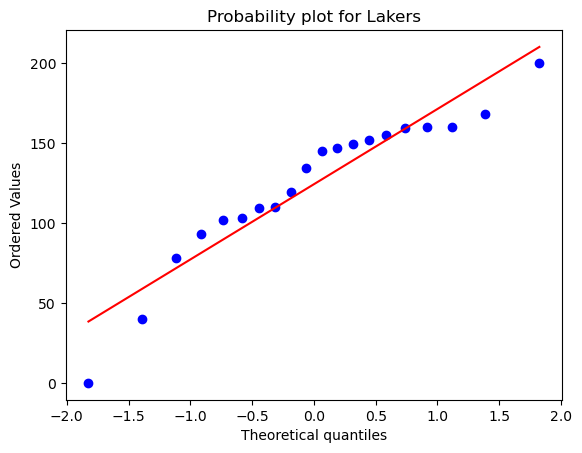

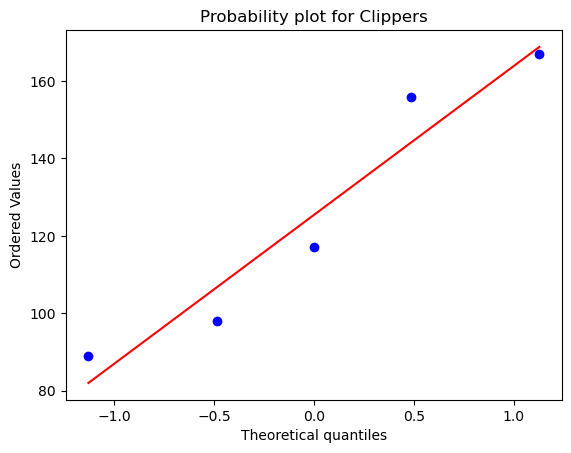

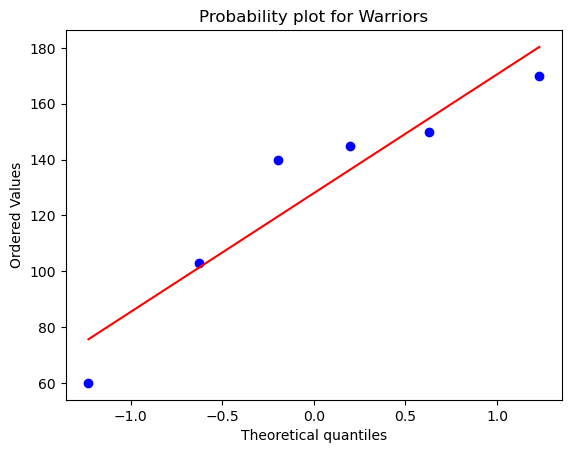

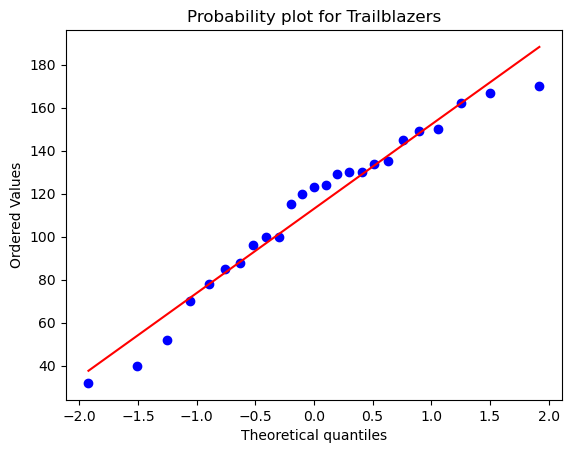

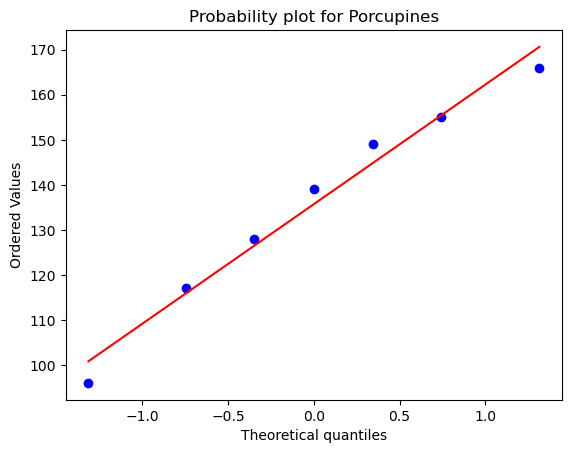

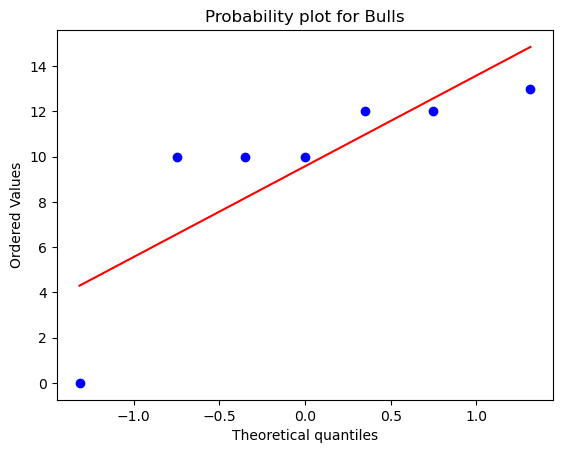

In [62]:
import scipy.stats as stats
unique_teams=sample_df['Team'].unique()
for i in unique_teams:
    stats.probplot(sample_df[sample_df['Team']==i]['Points_Scored'],dist='norm',plot=plt)
    plt.title('Probability plot for '+i)
    plt.show()

In [63]:
ratio=sample_df.groupby('Team').std().max()/sample_df.groupby('Team').std().min()
ratio

Points_Scored                     10.686747
Weightlifting_Sessions_Average     7.788881
Yoga_Sessions_Average              8.469196
Laps_Run_Per_Practice_Average      8.305807
Water_Intake                            inf
Players_Absent_For_Sessions        1.409480
dtype: float64

In [64]:
#anova table from scratch
data=[['Between Groups','','','','','',''],['Within Groups','','','','','',''],['Total','','','','','','']]
anova_table=pd.DataFrame(data,columns=['Variation','SS','df','MS','F value','P value', 'F critical'])
anova_table.set_index('Variation',inplace=True)

In [65]:
x_bar=sample_df['Points_Scored'].mean()
SSTR=sample_df.groupby('Team').count()*(sample_df.groupby('Team').mean()-x_bar)**2

In [66]:
anova_table['SS']['Between Groups']=SSTR['Points_Scored'].sum()

In [67]:
anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,82577.99,,,,,
Within Groups,,,,,,
Total,,,,,,


In [68]:
SSe=(sample_df.groupby('Team').count()-1)*sample_df.groupby('Team').std()**2

In [69]:
anova_table['SS']['Within Groups']=SSe['Points_Scored'].sum()

In [70]:
anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,82577.99,,,,,
Within Groups,93179.852857,,,,,
Total,,,,,,


In [71]:
total=SSe['Points_Scored'].sum()+SSTR['Points_Scored'].sum()

In [72]:
anova_table['SS']['Total']=total

In [73]:
anova_table['df']['Between Groups']=sample_df['Team'].nunique()-1
anova_table['df']['Within Groups']=sample_df.shape[0]-sample_df['Team'].nunique()
anova_table['df']['Total']=sample_df.shape[0]-1

In [74]:
anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,82577.99,5,,,,
Within Groups,93179.852857,64,,,,
Total,175757.842857,69,,,,


In [75]:
anova_table['MS']=anova_table['SS']/anova_table['df']
anova_table['F value']['Between Groups']=anova_table['MS']['Between Groups']/anova_table['MS']['Within Groups']
anova_table['P value']['Between Groups']=1-stats.f.cdf(anova_table['F value']['Between Groups'],anova_table['df']['Between Groups'],anova_table['df']['Within Groups'])
anova_table


,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,82577.99,5,16515.598,11.343635,0.0,
Within Groups,93179.852857,64,1455.935201,,,
Total,175757.842857,69,2547.215114,,,


In [76]:
alpha=0.05
hypothesis_type="two tailed"
if hypothesis_type=="two tailed":
    alpha=alpha/2


anova_table['F critical']['Between Groups']=stats.f.ppf(1-alpha, anova_table['df']['Between Groups'],anova_table['df']['Within Groups'])
anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,82577.99,5,16515.598,11.343635,0.0,2.772001
Within Groups,93179.852857,64,1455.935201,,,
Total,175757.842857,69,2547.215114,,,


In [77]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

# Fit the model
model = ols('Points_Scored ~ C(Team)', data=sample_df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                sum_sq    df          F        PR(>F)
C(Team)   82577.990000   5.0  11.343635  7.413913e-08
Residual  93179.852857  64.0        NaN           NaN


In [78]:
sample_df.columns

Index(['Team', 'Points_Scored', 'Weightlifting_Sessions_Average',
       'Yoga_Sessions_Average', 'Laps_Run_Per_Practice_Average',
       'Water_Intake', 'Players_Absent_For_Sessions'],
      dtype='object')

In [79]:
one_hot_df=pd.get_dummies(df_clean,columns=['Team'],drop_first=True)

In [80]:
one_hot_df.columns

Index(['Points_Scored', 'Weightlifting_Sessions_Average',
       'Yoga_Sessions_Average', 'Laps_Run_Per_Practice_Average',
       'Water_Intake', 'Players_Absent_For_Sessions', 'Team_Clippers',
       'Team_Lakers', 'Team_Porcupines', 'Team_Trailblazers', 'Team_Warriors'],
      dtype='object')

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [82]:
x=one_hot_df[['Weightlifting_Sessions_Average','Yoga_Sessions_Average', 'Laps_Run_Per_Practice_Average','Water_Intake', 'Players_Absent_For_Sessions', 'Team_Clippers','Team_Lakers', 'Team_Porcupines', 'Team_Trailblazers', 'Team_Warriors']]
y=one_hot_df[['Points_Scored']]

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape, x_test.shape, x.shape,y_train.shape

((124, 10), (32, 10), (156, 10), (124, 1))

In [84]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np
# Instantiate the KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform", missing_values=np.nan)
x_train_full=imputer.fit_transform(x_train)
x_train_clean=pd.DataFrame(x_train_full,columns=x_train.columns)
x_train_clean.head()

,Weightlifting_Sessions_Average,Yoga_Sessions_Average,Laps_Run_Per_Practice_Average,Water_Intake,Players_Absent_For_Sessions,Team_Clippers,Team_Lakers,Team_Porcupines,Team_Trailblazers,Team_Warriors
0,19.0,11.0,23.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0
1,19.0,13.0,23.0,4.0,3.0,0.0,0.0,0.0,0.0,1.0
2,20.0,14.0,25.0,2.0,6.0,0.0,1.0,0.0,0.0,0.0
3,24.0,19.0,27.0,3.0,3.0,0.0,0.0,0.0,1.0,0.0
4,43.0,46.0,49.0,3.0,4.0,0.0,0.0,1.0,0.0,0.0


In [85]:
x_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Weightlifting_Sessions_Average  124 non-null    float64
 1   Yoga_Sessions_Average           124 non-null    float64
 2   Laps_Run_Per_Practice_Average   124 non-null    float64
 3   Water_Intake                    124 non-null    float64
 4   Players_Absent_For_Sessions     124 non-null    float64
 5   Team_Clippers                   124 non-null    float64
 6   Team_Lakers                     124 non-null    float64
 7   Team_Porcupines                 124 non-null    float64
 8   Team_Trailblazers               124 non-null    float64
 9   Team_Warriors                   124 non-null    float64
dtypes: float64(10)
memory usage: 9.8 KB


In [86]:
y_train = y_train['Points_Scored'] if isinstance(y_train, pd.DataFrame) else y_train
common_index = x_train_clean.index.intersection(y_train.index)
x_train_aligned = x_train_clean.loc[common_index]
y_train_aligned = y_train.loc[common_index]
assert x_train_aligned.index.equals(y_train_aligned.index), "Indices are not aligned!"

In [87]:
import statsmodels.api as sm
result=sm.OLS(y_train_aligned,x_train_aligned).fit()

In [88]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Points_Scored   R-squared (uncentered):                   0.859
Model:                            OLS   Adj. R-squared (uncentered):              0.843
Method:                 Least Squares   F-statistic:                              53.20
Date:                Sun, 16 Jun 2024   Prob (F-statistic):                    8.81e-33
Time:                        14:24:03   Log-Likelihood:                         -521.87
No. Observations:                  97   AIC:                                      1064.
Df Residuals:                      87   BIC:                                      1089.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Weightlifting_Sessions_Average    -1.4772      3.762     -0.393      0.696      -8.955       6.001
Yoga_Sessions_Average             -0.1189      2.300     -0.052      0.959      -4.690       4.452
Laps_Run_Per_Practice_Average      2.3706      3.430      0.691      0.491      -4.448       9.189
Water_Intake                       3.7071      7.140      0.519      0.605     -10.484      17.898
Players_Absent_For_Sessions        6.2546      2.723      2.297      0.024       0.842      11.667
Team_Clippers                     73.7540     46.534      1.585      0.117     -18.737     166.245
Team_Lakers                       43.6644     31.651      1.380      0.171     -19.245     106.574
Team_Porcupines                   56.9524     38.445      1.481      0.142     -19.462     133.367
Team_Trailblazers                 58.9443     29.460      2.001      0.049       0.389     117.499
Team_Warriors                     75.6055     32.116      2.354      0.021      11.772     139.439
==============================================================================
Omnibus:                        1.466   Durbin-Watson:                   1.324
Prob(Omnibus):                  0.480   Jarque-Bera (JB):                1.038
Skew:                           0.240   Prob(JB):                        0.595
Kurtosis:                       3.161   Cond. No.                         623.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
x_const=sm.add_constant(x_train_aligned)
result=sm.OLS(y_train_aligned,x_const).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Points_Scored   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.177
Date:                Sun, 16 Jun 2024   Prob (F-statistic):              0.318
Time:                        14:24:03   Log-Likelihood:                -501.89
No. Observations:                  97   AIC:                             1026.
Df Residuals:                      86   BIC:                             1054.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            132.5083     20.015      6.621      0.000      92.721     172.296
Weightlifting_Sessions_Average    -2.2504      3.082     -0.730      0.467      -8.377       3.876
Yoga_Sessions_Average              0.4973      1.885      0.264      0.793      -3.250       4.245
Laps_Run_Per_Practice_Average     -0.3663      2.838     -0.129      0.898      -6.009       5.276
Water_Intake                      15.8140      6.124      2.582      0.012       3.640      27.988
Players_Absent_For_Sessions       -2.2980      2.576     -0.892      0.375      -7.420       2.824
Team_Clippers                     27.5614     38.726      0.712      0.479     -49.423     104.546
Team_Lakers                      -11.0744     27.197     -0.407      0.685     -65.139      42.991
Team_Porcupines                   48.7258     31.496      1.547      0.126     -13.886     111.337
Team_Trailblazers                 16.4787     24.954      0.660      0.511     -33.129      66.086
Team_Warriors                      8.1493     28.195      0.289      0.773     -47.900      64.199
==============================================================================
Omnibus:                        5.722   Durbin-Watson:                   1.211
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                8.488
Skew:                           0.116   Prob(JB):                       0.0143
Kurtosis:                       4.430   Cond. No.                         646.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
x_test_full=imputer.fit_transform(x_test)
x_test_clean=pd.DataFrame(x_test_full,columns=x_test.columns)
x_test_clean.shape

(32, 10)

In [91]:
res=result.predict(sm.add_constant(x_test_clean[['Weightlifting_Sessions_Average', 'Yoga_Sessions_Average',
       'Laps_Run_Per_Practice_Average', 'Water_Intake',
       'Players_Absent_For_Sessions', 'Team_Clippers', 'Team_Lakers',
       'Team_Porcupines', 'Team_Trailblazers', 'Team_Warriors']]))

In [92]:
res

0     136.844705
1     139.019454
2     115.601108
3     113.461315
4     115.282394
5     124.917978
6     134.300527
7     174.263226
8     104.186838
9     123.101901
10    129.808282
11    136.636157
12    170.326124
13    126.578590
14    144.561180
15    132.478085
16    125.709500
17    132.622632
18    132.303918
19    124.584635
20    139.867754
21     90.952657
22    137.039424
23    178.879641
24    153.922795
25    133.691348
26    102.837254
27    133.565628
28    125.405896
29    126.992087
30    119.624050
31    110.725964
dtype: float64

In [93]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [94]:
print(mean_absolute_error(y_test,res),"mean squared error", np.sqrt(mean_squared_error(y_test,res)))

36.80387752728337 mean squared error 48.611002173297194


In [95]:
from sklearn.preprocessing import PolynomialFeatures

In [110]:
poly=PolynomialFeatures(degree=1)
X_poly=poly.fit_transform(x_train_clean)
poly.fit(X_poly,y_train)
PolynomialFeatures()

PolynomialFeatures()

In [111]:
from sklearn import linear_model
lm=linear_model.LinearRegression()
lm.fit(X_poly,y_train)
LinearRegression()

LinearRegression()

In [112]:
from sklearn import metrics
predictions=lm.predict(poly.fit_transform(x_test_full))
print(metrics.r2_score(y_test,predictions))

0.4724226189660584
